In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
!pip install h5py

In [7]:
# baseline model with dropout on the cifar10 dataset
import sys
import tensorflow
from tensorflow import keras
from matplotlib import pyplot
from keras.datasets import cifar10
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [8]:
from sklearn.preprocessing import StandardScaler
def Standardization(X1,X2):
  scaler = StandardScaler()
  
  nsamples, nx, ny,nz = X1.shape
  d1_train_dataset = X1.reshape((nsamples,nx*ny*nz))
  standardized_1 = scaler.fit_transform(d1_train_dataset)

  nsampless, nxx, nyy,nzz = X2.shape
  d2_train_dataset = X2.reshape((nsampless,nxx*nyy*nzz))
  standardized_2 = scaler.fit_transform(d2_train_dataset)
  
  return standardized_1,standardized_2

In [9]:
import numpy as np
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
print(trainX.shape)
print(testX.shape)
trainX, testX =Standardization(trainX, testX)
print(trainX.shape)
print(testX.shape)
print(np.mean(trainX))
print(np.std(trainX))
print(np.mean(testX))
print(np.std(testX))

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 3072)
(10000, 3072)
-1.4948844e-09
0.99999964
-1.6538301e-08
0.9999999


In [11]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [5]:
import matplotlib.pyplot as plt

def summarize_diagnostics(history):
	fig, (ax1, ax2) = plt.subplots(2)
	# plot loss
	ax1.set_title('Cross Entropy Loss')
	ax1.plot(history.history['loss'], color='blue', label='train')
	ax1.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	ax2.set_title('Classification Accuracy')
	ax2.plot(history.history['accuracy'], color='blue', label='train')
	ax2.plot(history.history['val_accuracy'], color='orange', label='test')
	fig.tight_layout()
	# save plot to file
	filename = 'Enter filename'
	plt.savefig(filename + '_plot.png')
	plt.show()

**Weight Decay With Normalization**

> 76.330


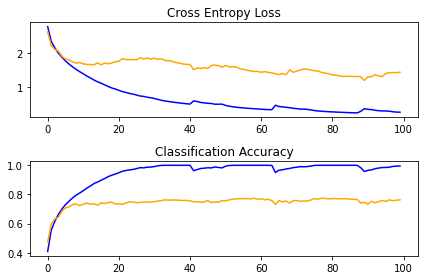

In [13]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  trainX, testX =Standardization(trainX, testX)
  # Reshape
  nsamples, nx =trainX.shape
  trainX = trainX.reshape((nsamples,32,32,3))
  nnsamples, nnx =testX.shape
  testX = testX.reshape((nnsamples,32,32,3))
  # define model
  model = define_model()
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
  model.save('final_model.h5')
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

**Weight Decay Without Normalization**

> 72.950 %


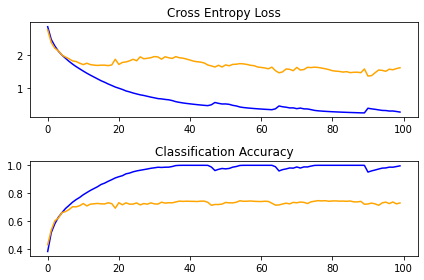

In [15]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  #trainX, testX =Standardization(trainX, testX)
  # Reshape
  #nsamples, nx =trainX.shape
  #trainX = trainX.reshape((nsamples,32,32,3))
  #nnsamples, nnx =testX.shape
  #testX = testX.reshape((nnsamples,32,32,3))
  # define model
  model = define_model()
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
  model.save('final_modell.h5')
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0),"%")
  # learning curves
  summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()